# Gensim word embedding

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with much lower dimension.

Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space.

Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace.

The points have some nice properties (words with similar meanings tend to occur closer to each other) [proximity is measured using cosine distance between 2 word vectors]

You can use on of the performance evaluation methods, such as the Word error rate (WER) or Preplexity (PPR).

Word2vec training is an unsupervised task, there’s no good way to objectively evaluate the result. Evaluation depends on your end application.

In [40]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [41]:
# define training data
sentences = [
            ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']
            ]

In [42]:
# Gensim word2vec model

# min_count: Words below the min_count frequency are dropped before training occurs

# size : Dimensionality of the feature vectors (normal range 100 to 300)

# sg : skip-gram or CBOW

from gensim.models import Word2Vec
model = Word2Vec(sentences, size=300, min_count=1)

In [43]:
model.wv.vocab # wv objects contain mapping b/w words and embedding

{'this': <gensim.models.keyedvectors.Vocab at 0x49dd8e0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x49ddd60>,
 'the': <gensim.models.keyedvectors.Vocab at 0x49dd808>,
 'first': <gensim.models.keyedvectors.Vocab at 0x49dde98>,
 'sentence': <gensim.models.keyedvectors.Vocab at 0x49dd658>,
 'for': <gensim.models.keyedvectors.Vocab at 0x49dde50>,
 'word2vec': <gensim.models.keyedvectors.Vocab at 0x49dd490>,
 'second': <gensim.models.keyedvectors.Vocab at 0x49dd778>,
 'yet': <gensim.models.keyedvectors.Vocab at 0x49ddef8>,
 'another': <gensim.models.keyedvectors.Vocab at 0x49ddd00>,
 'one': <gensim.models.keyedvectors.Vocab at 0x49dddd8>,
 'more': <gensim.models.keyedvectors.Vocab at 0x49ddb38>,
 'and': <gensim.models.keyedvectors.Vocab at 0x49dd898>,
 'final': <gensim.models.keyedvectors.Vocab at 0x49ddd30>}

In [44]:
model[model.wv.vocab]

array([[ 9.3474059e-04, -1.2397201e-03, -5.7488465e-04, ...,
         4.7587953e-04, -1.7098231e-04,  5.1608131e-05],
       [ 5.2183220e-04, -2.8954138e-04,  1.5949433e-03, ...,
        -1.4195421e-04,  2.0076369e-04, -6.2771322e-04],
       [ 9.4563048e-04,  7.4043270e-04, -1.2772779e-03, ...,
         1.0228147e-03,  1.4452571e-03, -1.0443116e-03],
       ...,
       [-7.1219128e-04,  5.2793475e-04, -5.9428083e-04, ...,
         7.7968405e-04,  6.8202015e-04,  5.2004913e-04],
       [ 1.9807000e-04,  1.3697292e-03,  1.2804329e-03, ...,
         1.1800590e-03, -5.8450934e-04, -3.9673451e-04],
       [-9.4368780e-04,  1.3291637e-03, -5.1989371e-04, ...,
         1.1719497e-03,  3.4152597e-04,  1.3979293e-03]], dtype=float32)

In [45]:
model.wv.most_similar("first")

[('word2vec', 0.07985182851552963),
 ('sentence', 0.036238837987184525),
 ('more', 0.031186960637569427),
 ('another', 0.030362768098711967),
 ('this', -0.0013018168974667788),
 ('one', -0.00695493258535862),
 ('final', -0.010404408909380436),
 ('yet', -0.019741125404834747),
 ('and', -0.03142162039875984),
 ('second', -0.03764071315526962)]

In [46]:
model.wv['first'] # dimensionality or size of feature vecotor

array([-4.80971066e-04,  6.85635372e-04, -1.45494658e-03, -1.20409706e-03,
       -2.66982475e-04,  1.36695779e-03, -2.25089505e-04, -5.67820098e-04,
        3.70433001e-04, -1.48384995e-03,  6.08932642e-05,  2.23350304e-04,
       -6.63744227e-04,  1.35649019e-03,  1.11396264e-04,  3.01766180e-04,
       -1.48460816e-03,  1.26197422e-03, -1.65242050e-03, -1.27496116e-03,
       -1.73614026e-04,  7.60554758e-05,  1.30074588e-03,  7.00145960e-04,
       -1.38576771e-03, -1.45148297e-04, -1.38108619e-03,  1.01223739e-03,
       -1.08501315e-03, -1.24420412e-03,  3.69852089e-04,  5.02401308e-05,
       -7.42561242e-04,  1.53951661e-03, -7.20208336e-04, -1.07680995e-03,
        6.04422938e-04,  2.56982021e-04,  1.18024764e-04, -1.56695372e-04,
        3.61078361e-04, -1.88029357e-04, -3.50765506e-04, -1.05043838e-03,
        9.77800926e-04,  1.10251363e-03,  5.31006604e-04,  1.56616524e-03,
       -1.34955929e-03,  8.78855644e-05,  5.57851687e-04, -5.59356762e-04,
       -1.08118134e-03,  

## Visualising the Word Embeddings

In [47]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

## PCA visualization

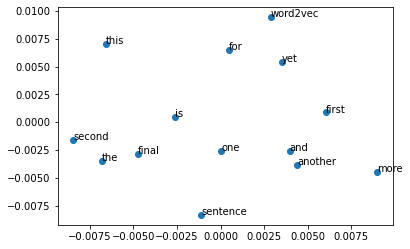

In [48]:
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

## t-SNE Visualization

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(X)

In [50]:
df = pd.DataFrame(tsne,columns = ['TSNE component 1', 'TSNE component 2'])
df['word'] = model.wv.vocab.keys()
df.head()

,TSNE component 1,TSNE component 2,word
0,266.298431,23.642027,this
1,132.896149,-161.362015,is
2,-329.322601,-13.235461,the
3,-253.241608,-196.550934,first
4,-166.223312,-377.834686,sentence


In [51]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 5)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

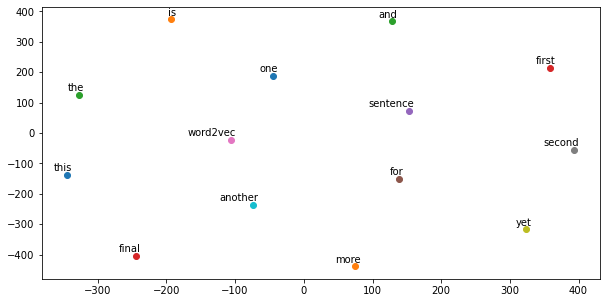

In [52]:
tsne_plot(model)